# Trends of SOL worktype 

## Part I

I first explored if any trends exist for SOL worktype per zip code. I tried to forecast with SARIMA. 

### Observations:
- SOL data was not predicted well by SARIMA, in fact, the predictions for most zipcodes become negative. 
- Two potentially reasons: 
    1. The trends are influenced by a once-off external factor. 
        - for instance, the big peak from 2015-2016 is likely a result of governmental incentives.
    2. Another possible explanation is that some areas are already saturated
        - on the heatmap, we can see clustered regions of SOL activities
    
    
## Part II: verify saturation per area

Understanding if any area has saturated with SOL works can help us predict which areas may have more SOL opportunities. 
- I checked how many SOL works are done per zip code per housing unit.
- I also checked the averaged number of SOL work done per housing unit for areas with different numbers of housing units. 

### what I learned:
- multiple works are done per housing unit for 02136, 02131, 02122
- And areas with 20-40 numbers of housing units have lots of work done per housing unit.  
    * one possible explanation is that housings in these areas are more isolated (e.g. small villages), and thus more dependent on solar power. 

In [1]:
import pandas as pd 
import pandas_profiling
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

In [6]:
df_tag = joblib.load('Data/df_tag_date.pkl')
df_tag.head(2)


,permitnumber,parcel_id,zip,worktype,year,month,tokens,tokens_filt,attic,basement,...,sola,solar,stove,strip,volt,wall,water,window,tag,date
0,A100137,2204944000,02135,EXTREN,2013,1,amend permit per,none,0,0,...,0,0,0,0,0,0,0,0,other,2013-01-03
1,A100764,502363000,02108,INTEXT,2012,1,interior exterior work indic draw amend permit,none,0,0,...,0,0,0,0,0,0,0,0,other,2012-01-05


In [12]:
SOL_df = df_tag[df_tag.worktype == 'SOL']
SOL_df.head()

,permitnumber,parcel_id,zip,worktype,year,month,tokens,tokens_filt,attic,basement,...,sola,solar,stove,strip,volt,wall,water,window,tag,date
55,A119050,700540020,02127,SOL,2012,2,correct structur ballast roof photovolta system,roof photovolta system,0,0,...,0,0,0,0,0,0,0,0,solar,2012-02-27
56,A119052,700540020,02127,SOL,2012,2,correct ballast roof mount photovolta system,roof photovolta system,0,0,...,0,0,0,0,0,0,0,0,solar,2012-02-27
65,A122886,1102219001,02130,SOL,2012,6,solar array relat compon amend longform,solar,0,0,...,0,1,0,0,0,0,0,0,solar,2012-06-12
259,A213657,2101478000,02134,SOL,2013,1,amend permit roof mount solar electr system co...,roof solar electr system solar panel roof wall,0,0,...,0,2,0,0,0,1,0,0,solar,2013-01-28
1985,ALT100397,1102636000,02130,SOL,2011,11,solar electr panel roof home interconnect home...,solar electr panel roof electr system,0,0,...,0,1,0,0,0,0,0,0,solar,2011-11-23


In [14]:
SOL_df.zip.unique()

array(['02127', '02130', '02134', '02135', '02120', '02128', '02131',
       '02124', '02126', '02125', '02122', '02119', '02132', '02121',
       '02163', '02136', '02118', '02215', '02115', '02129', '02116',
       '02467', nan, '02104', '02137', '02108'], dtype=object)

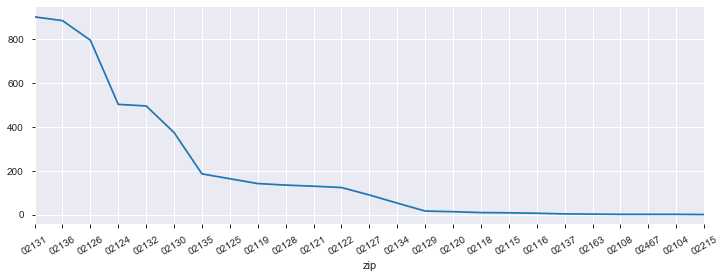

In [54]:
sorted_zip_SOL=SOL_df.groupby('zip')['permitnumber'].count().sort_values(ascending=False)
ax = sorted_zip_SOL.plot(figsize=(12,4),xticks=range(len(sorted_zip_SOL)), rot=30)

In [134]:
SOL_zips =  sorted_zip_SOL[sorted_zip_SOL >  100] # take zips more than 100

In [135]:
# filter SOL_df to zip codes with more than 100 permits
SOL_df = SOL_df[SOL_df.zip.isin(SOL_zips.index)]
SOL_df.head(2)

,permitnumber,parcel_id,zip,worktype,year,month,tokens,tokens_filt,attic,basement,...,sola,solar,stove,strip,volt,wall,water,window,tag,date
65,A122886,1102219001,02130,SOL,2012,6,solar array relat compon amend longform,solar,0,0,...,0,1,0,0,0,0,0,0,solar,2012-06-12
1985,ALT100397,1102636000,02130,SOL,2011,11,solar electr panel roof home interconnect home...,solar electr panel roof electr system,0,0,...,0,1,0,0,0,0,0,0,solar,2011-11-23


In [143]:
def zip_date_count(SOL_df,topzips):
    SOL_zip_df = pd.DataFrame(columns=SOL_df.zip.unique())
    SOL_zip_df['date'] = SOL_df.date.unique()
    for i in topzips:
        count= SOL_df[SOL_df.zip==i].groupby('date')['permitnumber'].count()
        SOL_zip_df[i][SOL_zip_df.date.isin(count.index)] = count.values
    SOL_zip_df['date'] = pd.to_datetime(SOL_zip_df['date'], infer_datetime_format=True)    
    SOL_zip_df = SOL_zip_df.set_index('date')
    
    return(SOL_zip_df)

In [145]:
SOL_zip_df = zip_date_count(SOL_df,SOL_zips.index)
SOL_zip_df.head(2)

,02130,02135,02128,02131,02124,02126,02125,02122,02119,02132,02121,02136
date,,,,,,,,,,,,
2012-06-12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
print('Earliest date: '  + str(SOL_zip_df.index.min()))
print('Lastest date: '  + str(SOL_zip_df.index.max()))

Earliest date: 2010-09-09 00:00:00
Lastest date: 2019-09-20 00:00:00


In [285]:
# resample by start of the month
SOL_y = SOL_zip_df.fillna(0).resample('MS').sum()
SOL_y.head(2)

,02130,02135,02128,02131,02124,02126,02125,02122,02119,02132,02121,02136
date,,,,,,,,,,,,
2010-09-01,4,0,0,2,0,0,0,0,0,0,0,0
2010-10-01,1,0,0,0,0,0,0,0,0,0,0,0


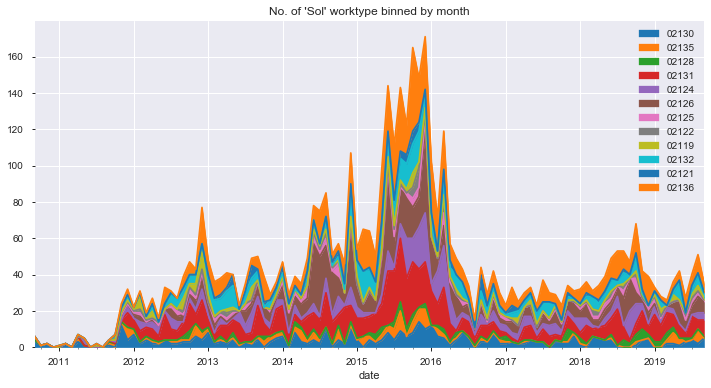

In [284]:
# area plot to see any trend in these zip codes over time
SOL_y.plot.area(figsize=(12, 6),title='No. of \'Sol\' worktype binned by month')
plt.show()

In [184]:
# comments: 
# For all zip codes, there's a big peak from 2nd quarter of 2015 to 2nd quarter of 2016. 
# Some other smaller peaks around begining of 2013, 2nd-3rd quarter of 2014, and last quarter of 2018. 

<Figure size 432x576 with 0 Axes>

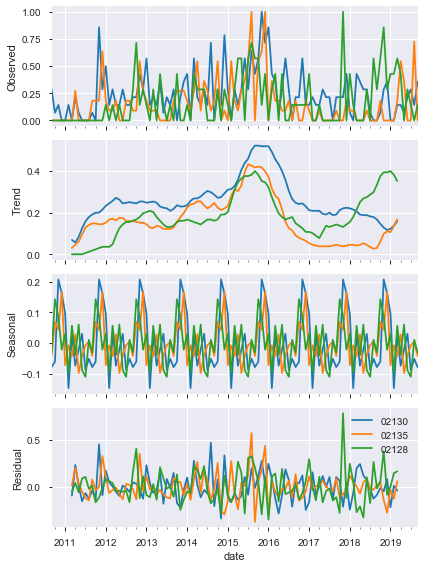

<Figure size 432x576 with 0 Axes>

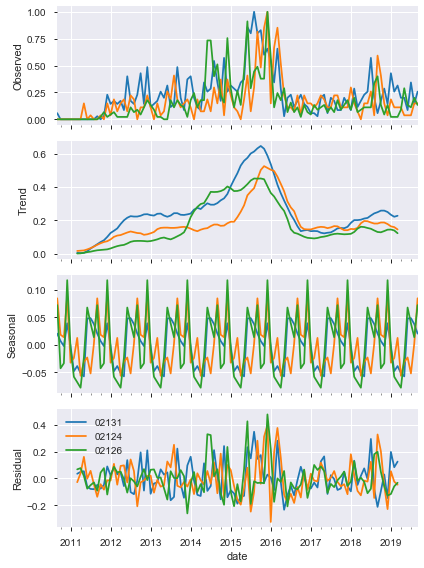

<Figure size 432x576 with 0 Axes>

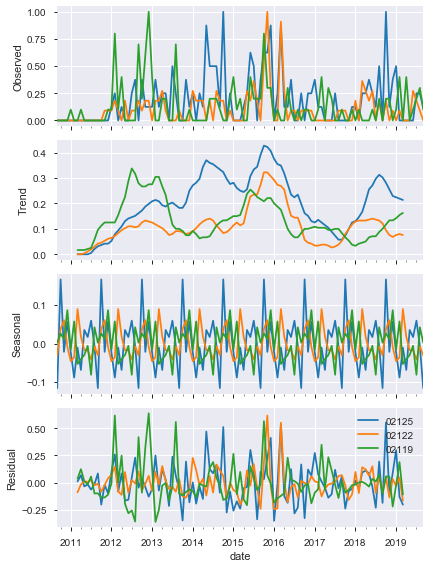

<Figure size 432x576 with 0 Axes>

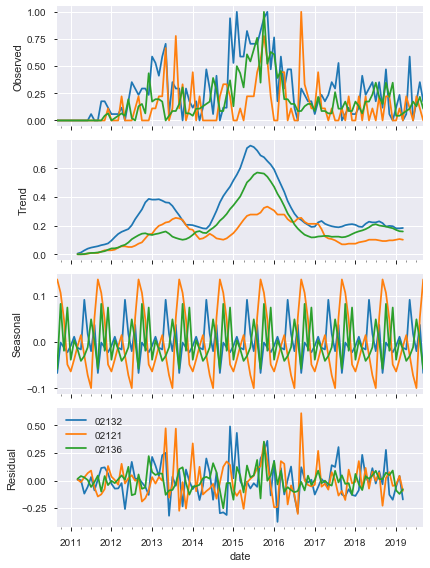

In [201]:
import itertools
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = (6, 8)

# plot the scaled dated to see them on same scales
SOL_y_scaled = (SOL_y -SOL_y.min())/(SOL_y.max() -SOL_y.min())

for i in [3,6,9,12] :
    decomposition = sm.tsa.seasonal_decompose(SOL_y_scaled.iloc[:,i-3:i], model='additive')
    plt.figure()
    decomposition.plot()
    plt.legend()
    plt.show()


In [280]:
import pmdarima as pm

def tag_smodel(data,stats=True):
    '''
    Auto fit sarima model with 90% of the data. 
    Predict 10% of the data + the next 12 month, and plot the forecast.  
    Option to print model stats and diagnostic plots. (stats=True)
    '''
    data = data['2012':] # try to use data after 2012
    train = data.iloc[:int(len(data)*0.80)] # use about 80% of the data to train    
    smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
    if stats:
        print(smodel.summary())
        smodel.plot_diagnostics(figsize=(7,5))
        plt.tight_layout()
        plt.show()
    
    # Forecast
    n_periods = int(len(data)*0.20)+12
    fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(5,3))
    plt.plot(data)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("SARIMA - Forecast of %s-tag" % data.name)
    plt.show()
    return(fitted_series)  
    
    

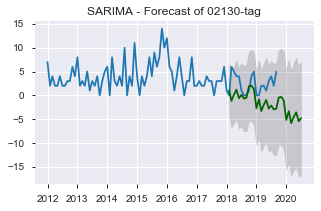

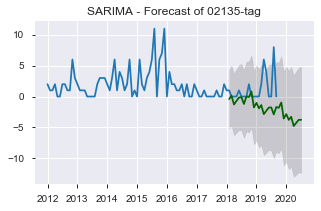

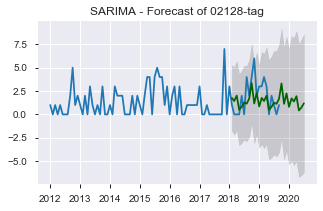

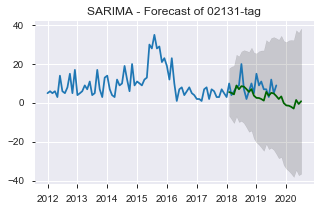

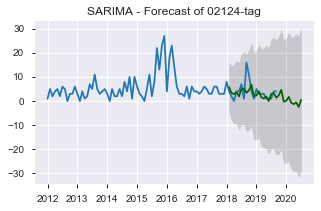

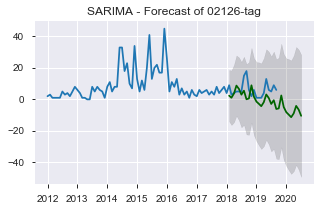

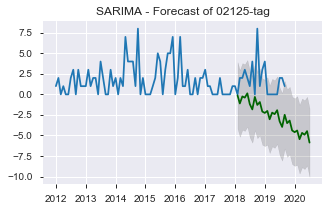

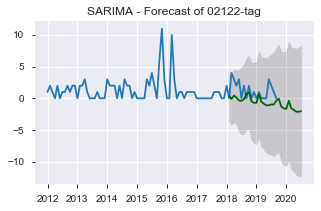

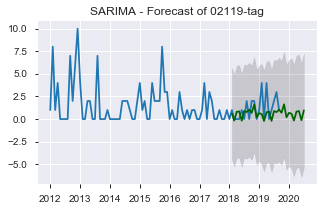

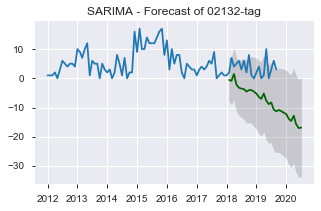

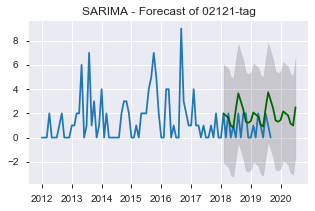

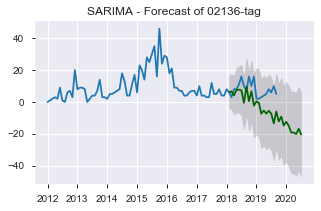

In [282]:
predicts = pd.DataFrame(columns =SOL_y.columns)
for i in SOL_y.columns:
    # if want to see the stats, pass 'True'
    predicts[i]=tag_smodel(SOL_y[i],False)

   
# Part II: 
- I checked how many SOL works is done per zip code per housing unit.
- I also checked the averaged number of SOL work done per housing unit for areas with different numbers of housing units. 

In [380]:
census = pd.read_csv('Data/parcels2018_to_census.csv')
census.head(2)

C:\Users\Huayi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,WARD,PARCEL,PID_LONG,WPD,BATCH,Shape__Are,Shape__Len,STATEFP10,COUNTYFP10,...,REALTOWN,TOWN_ID,COUSUBFP10,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,1001,14.0,5041,1405041000,14-08-050,NaN,6218.371338,344.992186,25,25,...,Boston,35,7000,140,49,181881,143478,143478,16097.697417,659.695040
1,1002,14.0,5069,1405069000,14-08-040,NaN,5687.368652,316.167102,25,25,...,Boston,35,7000,291,102,181889,143488,143488,27652.503604,816.775752


In [351]:
census = census.rename(columns={'PID_LONG':'parcel_id'})

In [352]:
SOL_census_df = pd.merge(SOL_df, census, on  ='parcel_id')

In [353]:
print('Total number of SOL data:' + str(len(SOL_df)))
print('Total number of SOL data with parcel_id in Census data:' + str(len(SOL_census_df)))
# data got reduced to 1/3. :(

Total number of SOL data:4829
Total number of SOL data with parcel_id in Census data:1634


In [354]:
SOL_HU100 = SOL_census_df.groupby('HU100_RE')['permitnumber'].count().sort_values(ascending=False)

In [355]:
# average number of housing units at each zip code
avgHU100_per_zip = SOL_census_df.groupby('zip')['HU100_RE'].mean()

In [356]:
SOL_per_zip = SOL_census_df.groupby('zip').count()['permitnumber']

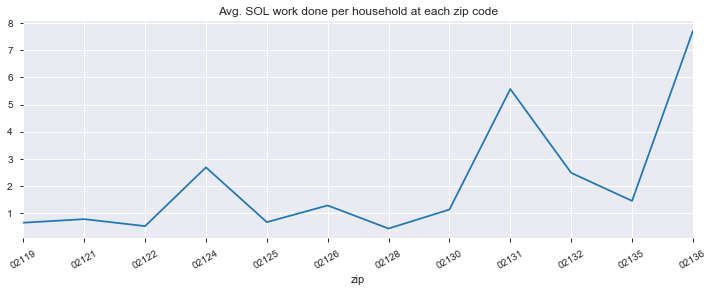

In [362]:
saturation_zip = SOL_per_zip/avgHU100_per_zip

saturation_zip.plot(figsize=(12,4),xticks=range(len(saturation_zip)), rot=30,title='Avg. SOL work done per household at each zip code')

In [390]:
count_per_avgHU100= SOL_census_df.groupby('HU100_RE').count()['permitnumber']

Text(0.5, 0, 'log(number of housing units)')

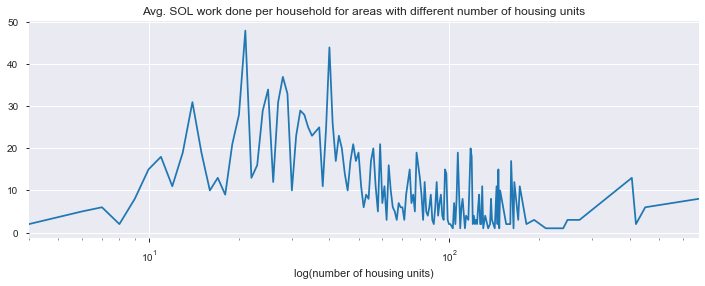

In [398]:
count_per_avgHU100.plot(figsize=(12,4),logx=True, title='Avg. SOL work done per household for areas with different number of housing units')
plt.xlabel('log(number of housing units)')